In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
from fitsio import FITS,FITSHDR
from astropy import units as u
from astropy.coordinates import SkyCoord
from scipy import stats
from astropy.table import Table, Column
from astropy.io import ascii
from scipy.interpolate import griddata
from sklearn import neighbors
import matplotlib.lines as mlines
from scipy.stats import kde


(-1, 2)

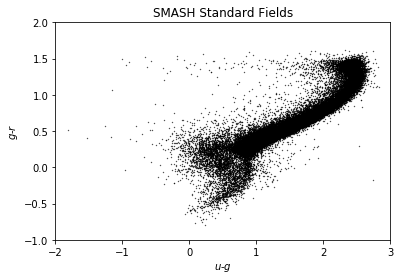

In [41]:
#color-color plot of all stars in SMASH standard star fields
standards = '/Users/amyel/research/SMASH_project/datafiles/smash_standards.fits'
fx = fitsio.FITS(standards)
objs = fx[1].read()
u_std = (objs["U"]-(4.239*objs["EBV"]))
g_std = (objs["G"]-(3.303*objs["EBV"]))
i_std = (objs["I"]-(1.263*objs["EBV"]))
r_std = (objs["R"]-(2.285*objs["EBV"]))
u_g_std = u_std - g_std
g_r_std = g_std - r_std
selected = np.where((u_std<=22)&(r_std<=22)&(g_std<=22))
u_std,g_std,r_std = u_std[selected],g_std[selected],r_std[selected]
plt.scatter((u_std-g_std),(g_std-r_std),s=0.1,c='k')
plt.title('SMASH Standard Fields')
plt.xlabel('$u$-$g$')
plt.ylabel('$g$-$r$')
plt.xlim(-2,3)
plt.ylim(-1,2)

In [42]:
xx_std, yy_std = np.mgrid[u_g_std.min():u_g_std.max():1000j, g_r_std.min():g_r_std.max():1000j]
positions = np.vstack([xx_std.ravel(), yy_std.ravel()])
values = np.vstack([u_g_std, g_r_std])
k_std = kde.gaussian_kde(values)

In [43]:
zz_std = np.reshape(k_std(positions).T, xx_std.shape)

In [44]:
filename = '/Users/amyel/research/SMASH_project/datafiles/SMASH_fields/vsix/starsthree/Field3_allobj_deep_stars.fits.gz'
fx = fitsio.FITS(filename)
objs = fx[1].read()

u = (objs["U"]-(4.239*objs["EBV"]))
g = (objs["G"]-(3.303*objs["EBV"]))
i = (objs["I"]-(1.263*objs["EBV"]))
r = (objs["R"]-(2.285*objs["EBV"]))
selected = np.where((u<=22)&(r<=22)&(g<=22)&(objs['CHI']<3)&(abs(objs['SHARP'])<1)&(objs['PROB']>.8))
u,g,r = u[selected],g[selected],r[selected]
u_g = u-g
g_r = g-r

/Users/amyel/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


(-0.5, 1.6)

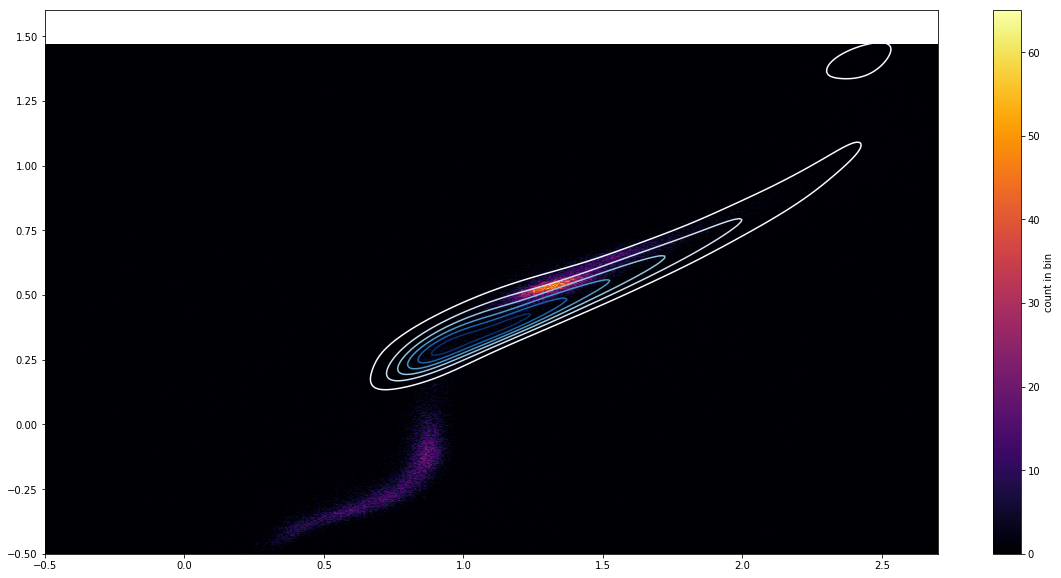

In [45]:
fig, ax = plt.subplots(figsize=(20, 10))
hess = stats.binned_statistic_2d(u_g, g_r, None, 'count',bins=1000)
im = ax.pcolormesh(hess.x_edge,hess.y_edge,hess.statistic.T,cmap='inferno')
ax.contour(xx_std,yy_std,zz_std,cmap='Blues')
cb = fig.colorbar(im,ax=ax,label='count in bin')
ax.set_xlim(-.5,2.7)
ax.set_ylim(-.5,1.6)

In [46]:
def density_plots(filename):
    
    fx = fitsio.FITS(filename)
    objs = fx[1].read()
    
    newstr = ''.join((ch if ch in '0123456789' else ' ') for ch in filename)
    field_number = [int(i) for i in newstr.split()]
    
    u = (objs["U"]-(4.239*objs["EBV"]))
    g = (objs["G"]-(3.303*objs["EBV"]))
    i = (objs["I"]-(1.263*objs["EBV"]))
    r = (objs["R"]-(2.285*objs["EBV"]))
    selected = np.where((u<=22)&(r<=22)&(g<=22)&(objs['CHI']<3)&(abs(objs['SHARP'])<1)&(objs['PROB']>.8))
    u,g,r = u[selected],g[selected],r[selected]
    u_g = u-g
    g_r = g-r
    
    fig, ax = plt.subplots(figsize=(20, 10))
    hess = stats.binned_statistic_2d(u_g, g_r, None, 'count',bins=1000)
    im = ax.pcolormesh(hess.x_edge,hess.y_edge,hess.statistic.T,cmap='inferno')
    ax.contour(xx_std,yy_std,zz_std,cmap='Blues')
    cb = fig.colorbar(im,ax=ax,label='count in bin')
    ax.set_xlim(-.5,2.7)
    ax.set_ylim(-.5,1.6)
    ax.set_title('Hess Diagram of SMASH Field '+str(field_number[0])+' with Contours of SMASH Standards Overlaid')
    
    plt.show(block=False)
    print('done with field '+str(field_number))
    return 0


In [47]:
fields = [3,5,12,13,40,48,50,56,58,59,91,92,98,164,176,178]


/Users/amyel/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


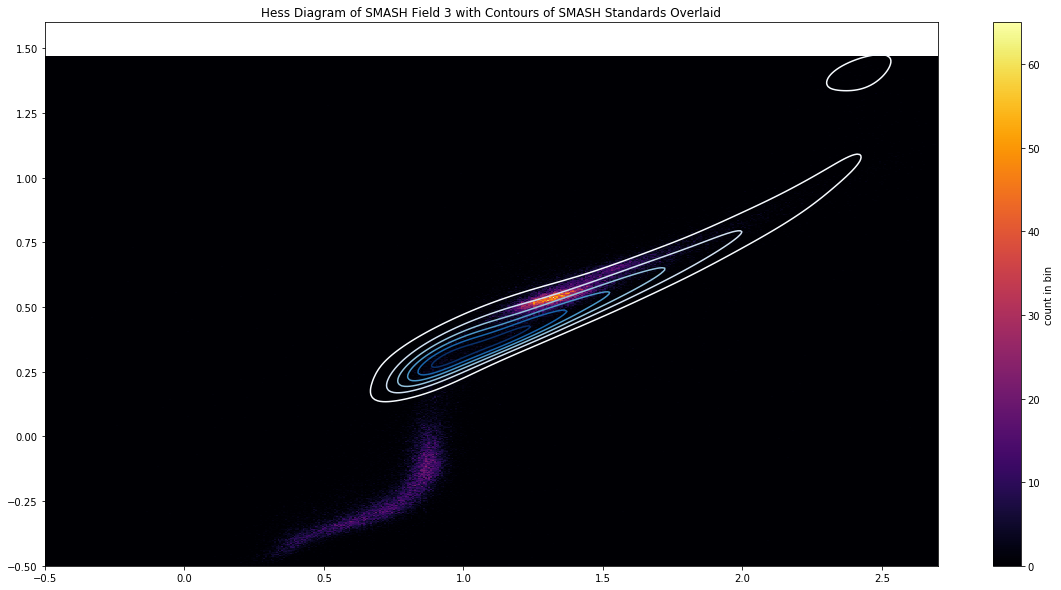

done with field [3]


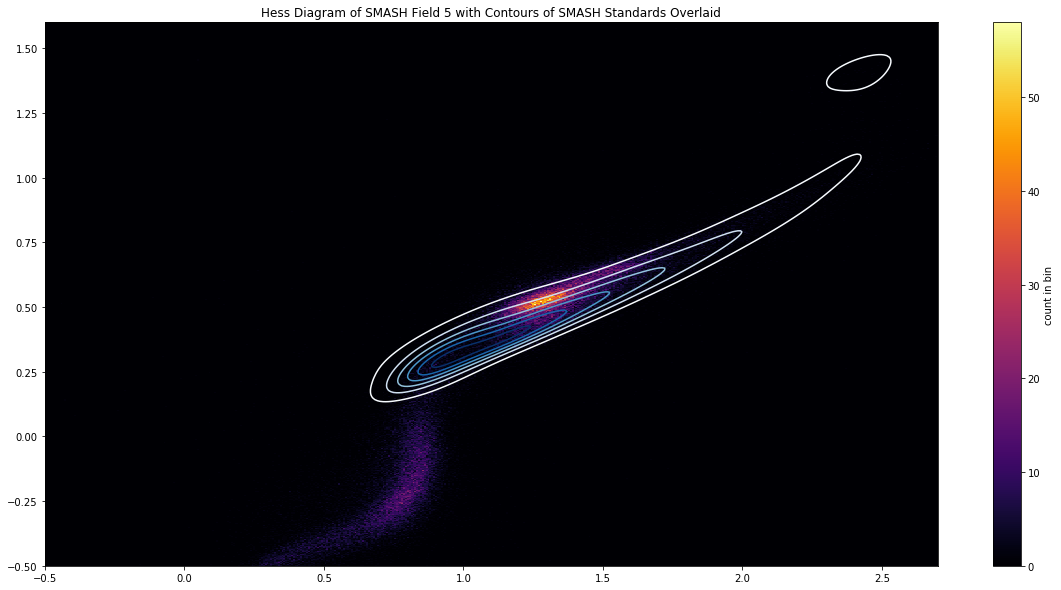

done with field [5]


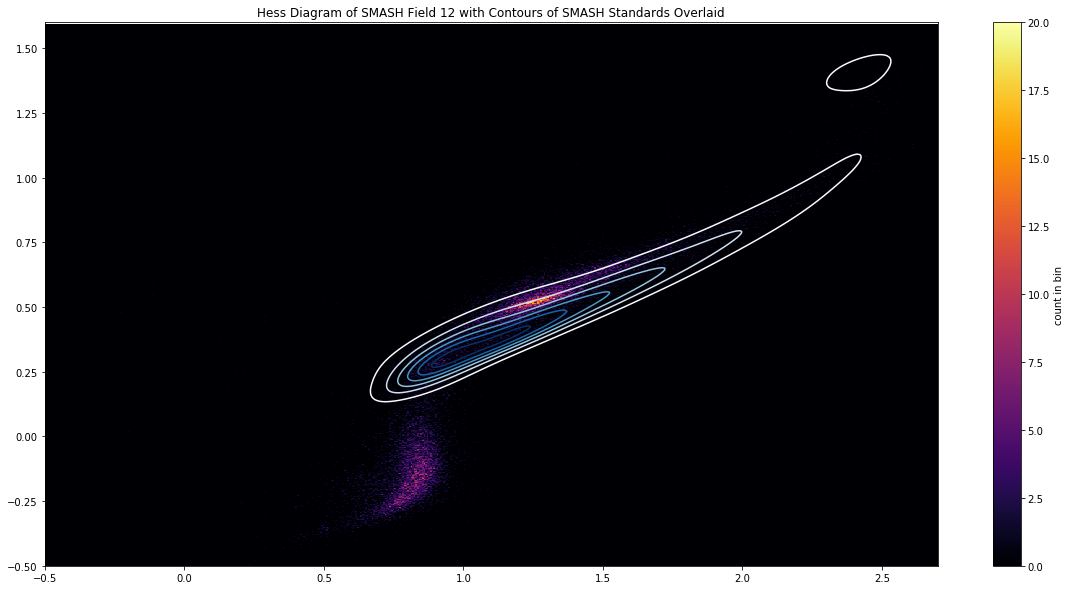

done with field [12]


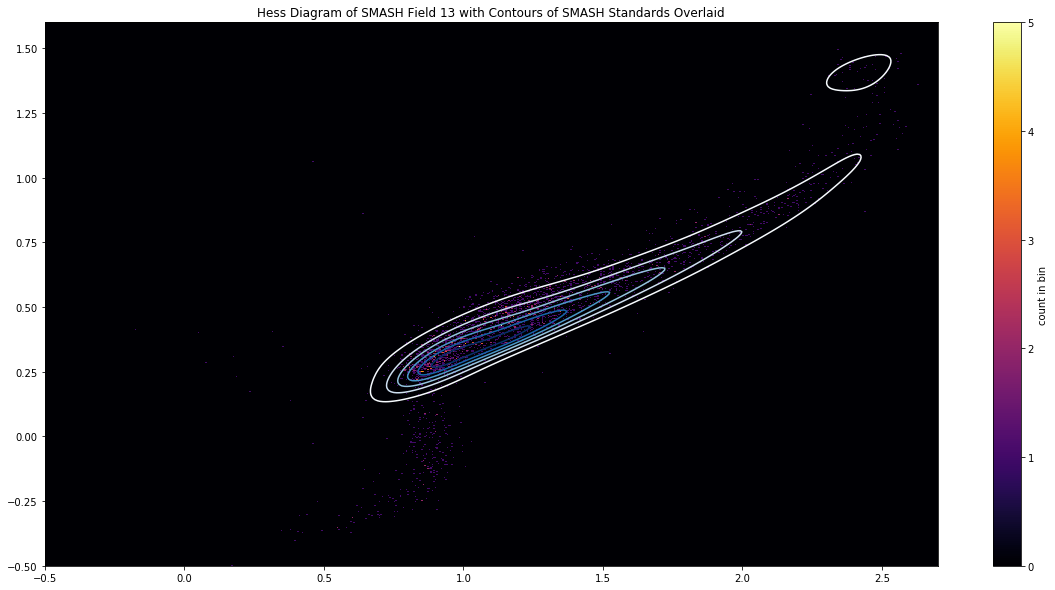

done with field [13]


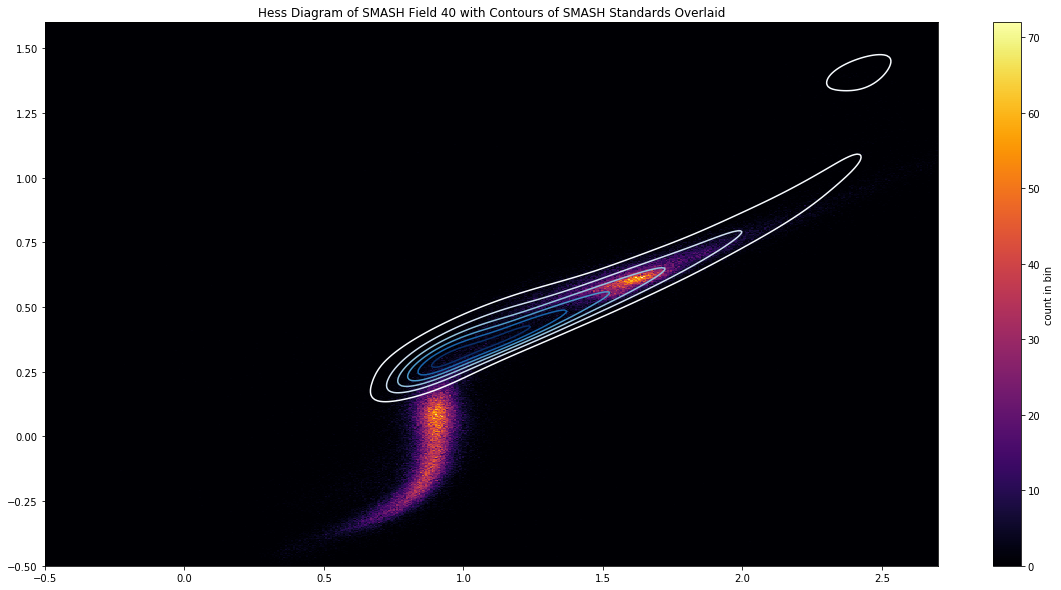

done with field [40]


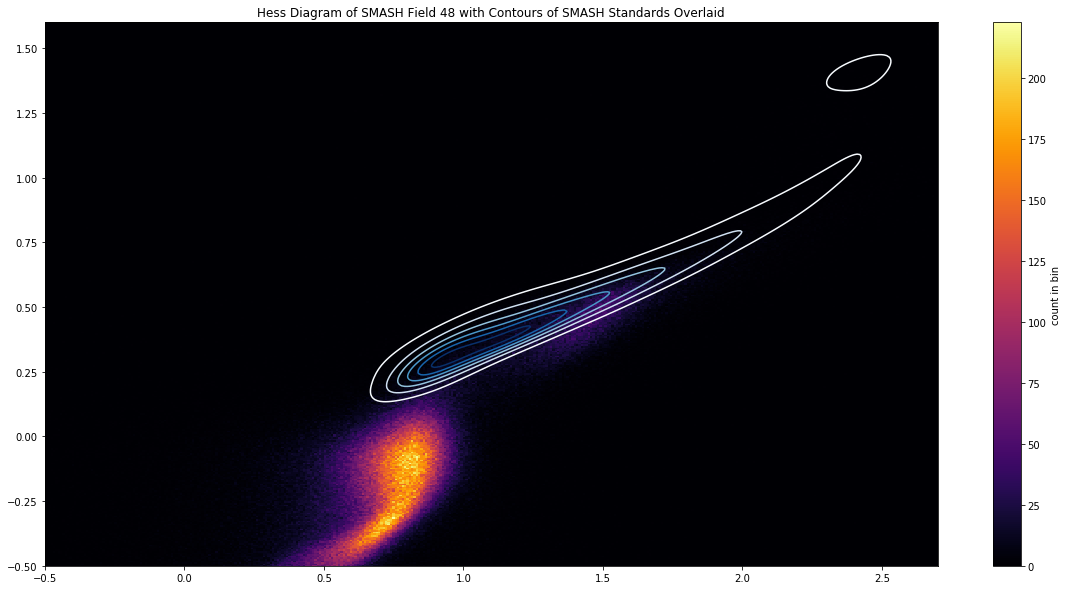

done with field [48]


/Users/amyel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less_equal
  del sys.path[0]


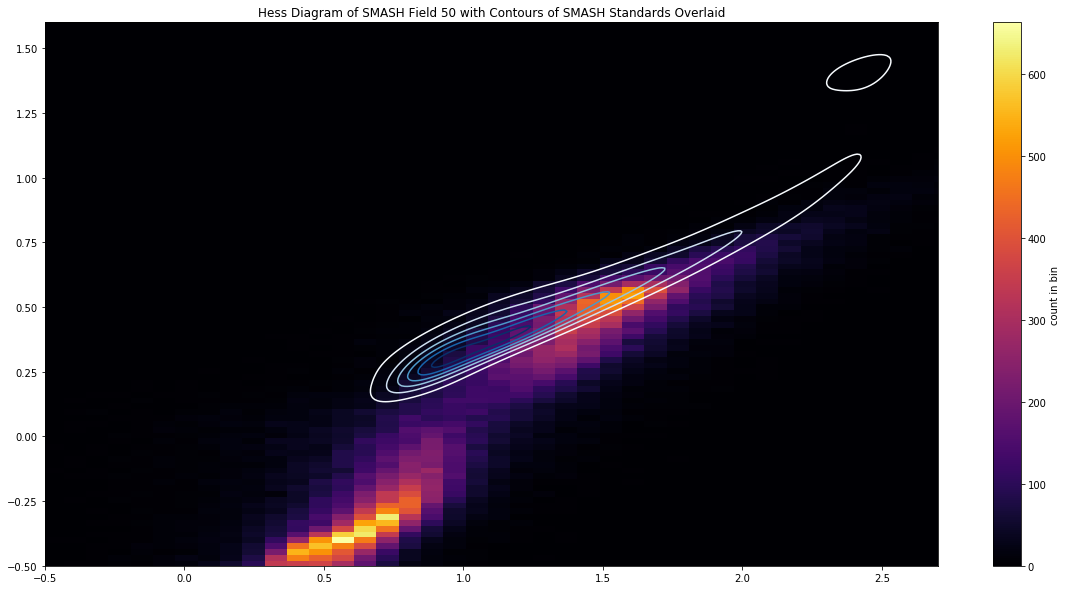

done with field [50]


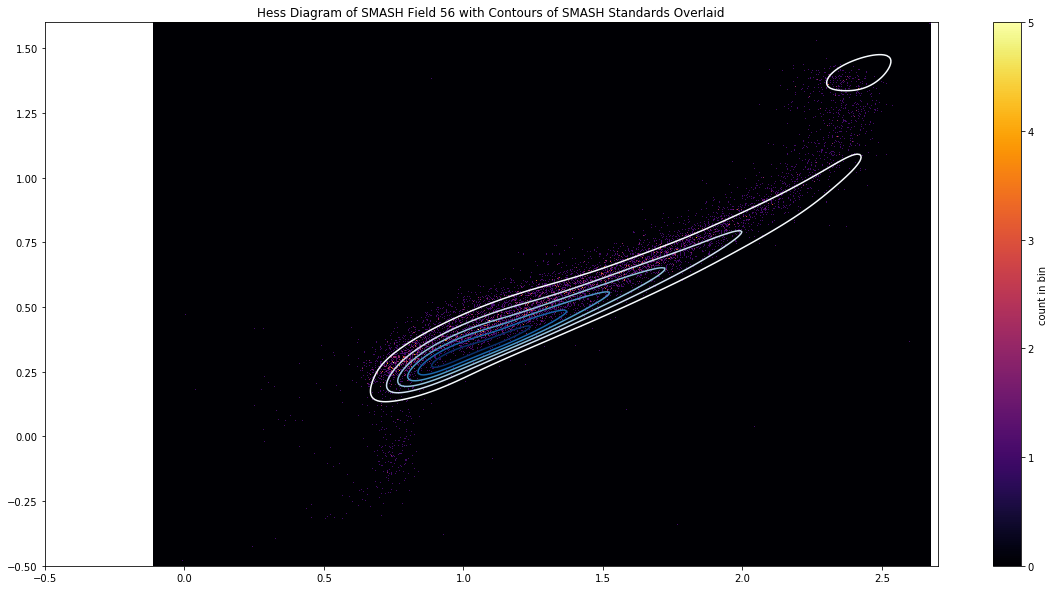

done with field [56]


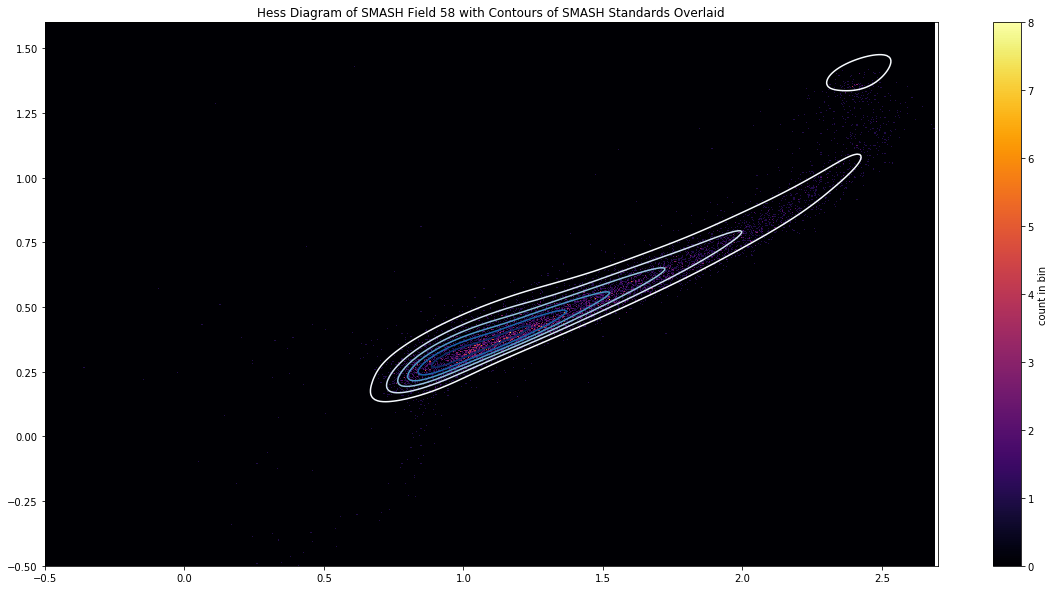

done with field [58]


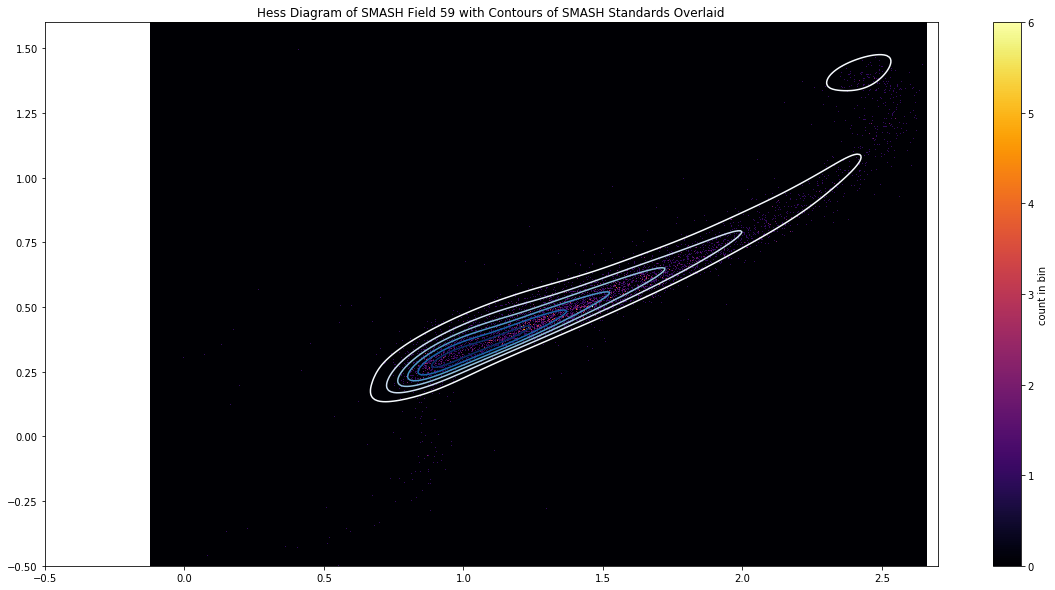

done with field [59]


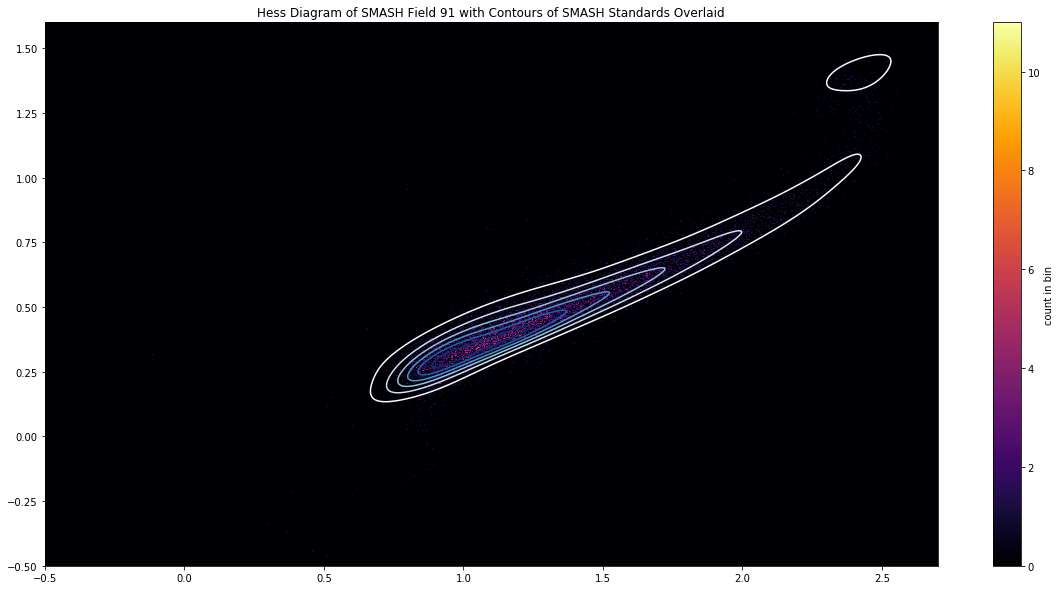

done with field [91]


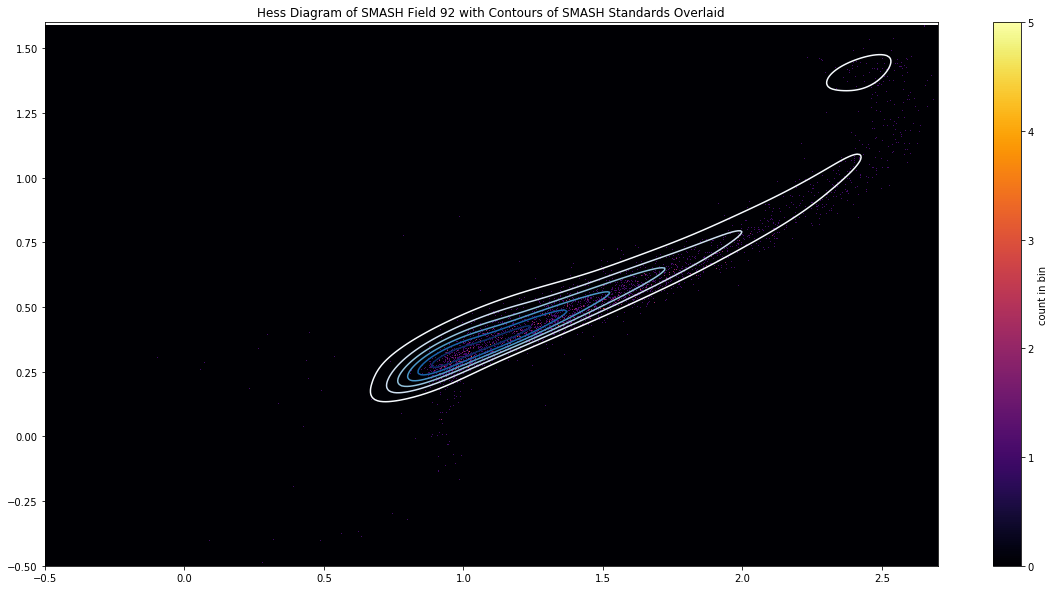

done with field [92]


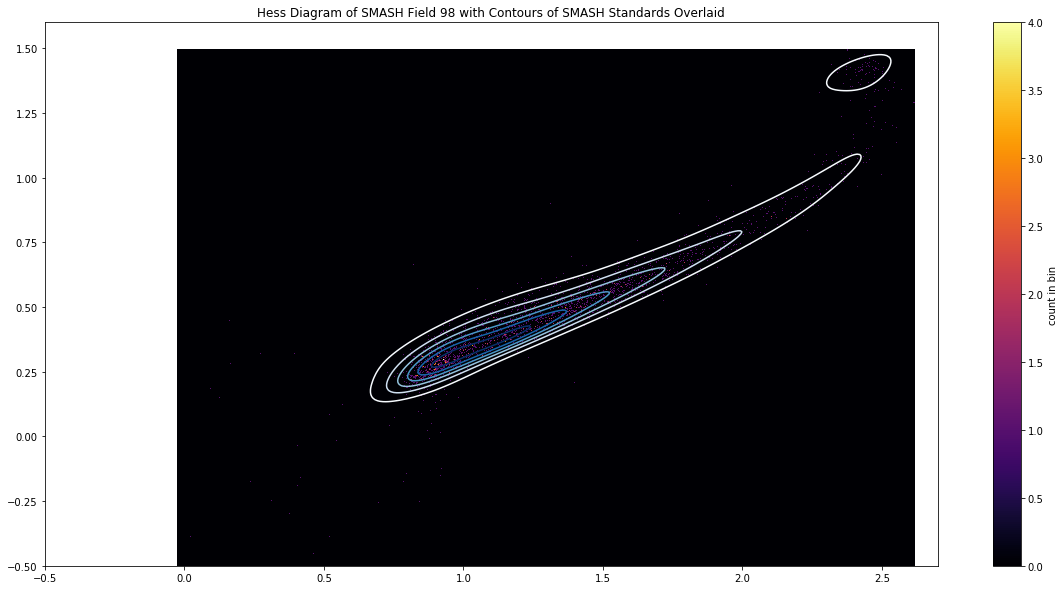

done with field [98]


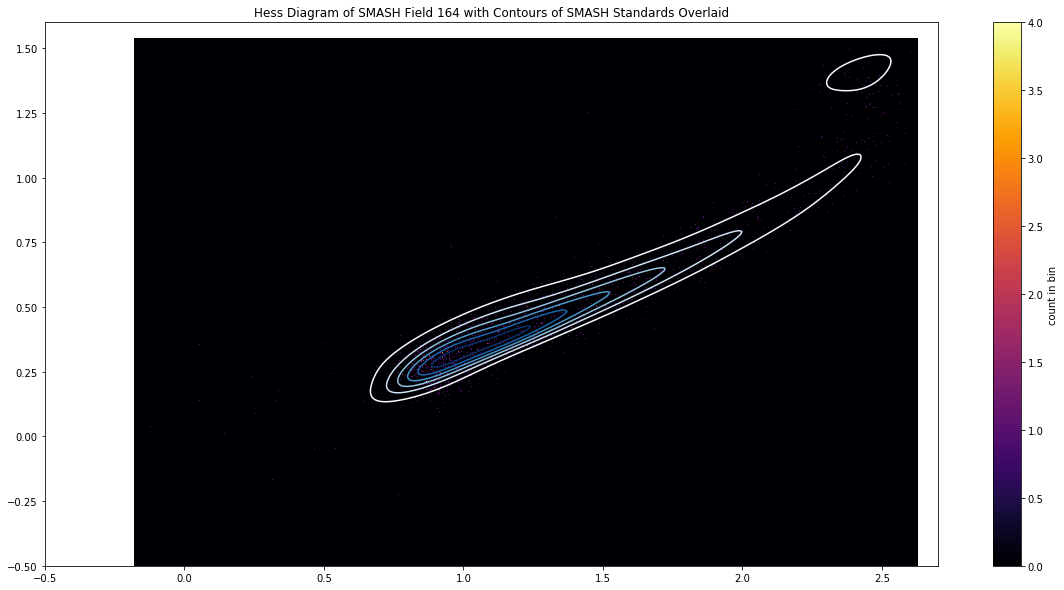

done with field [164]


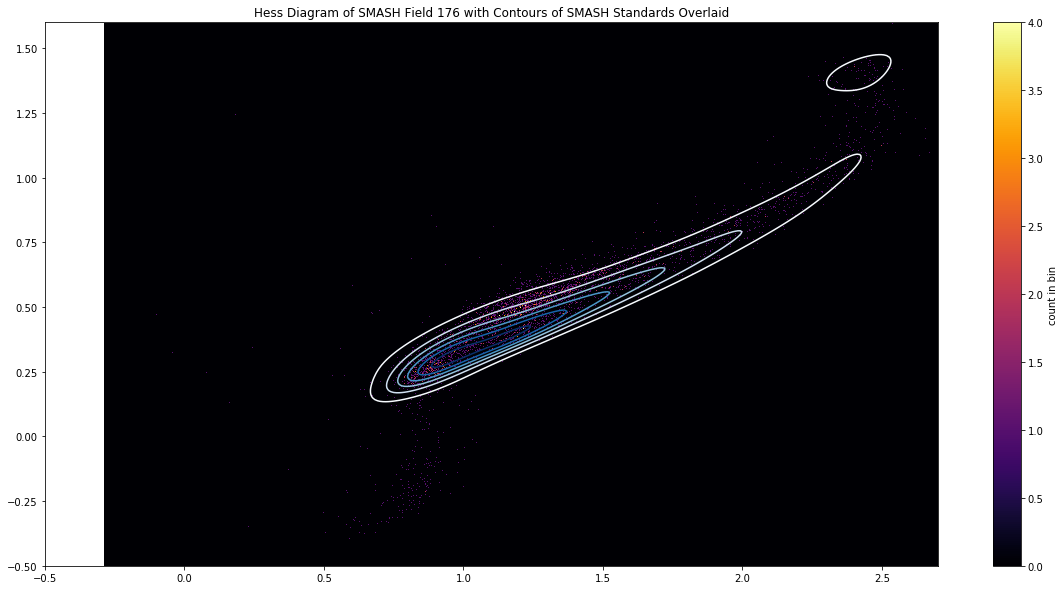

done with field [176]


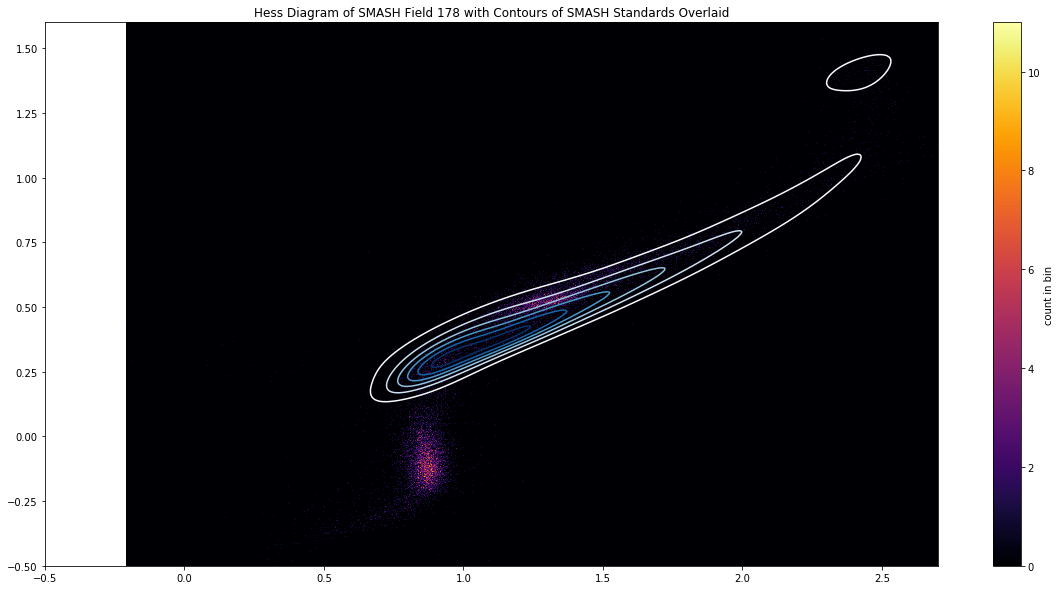

done with field [178]


In [48]:
if __name__=="__main__":
    for number in fields:
        density_plots('/Users/amyel/research/SMASH_project/datafiles/SMASH_fields/vsix/starsthree/Field{}_allobj_deep_stars.fits.gz'.format(number))

              

In [49]:
def density_plots(filename):
    
    fx = fitsio.FITS(filename)
    objs = fx[1].read()
    
    newstr = ''.join((ch if ch in '0123456789' else ' ') for ch in filename)
    field_number = [int(i) for i in newstr.split()]
    
    u = (objs["U"]-(4.239*objs["EBV"]))
    g = (objs["G"]-(3.303*objs["EBV"]))
    i = (objs["I"]-(1.263*objs["EBV"]))
    r = (objs["R"]-(2.285*objs["EBV"]))
    selected = np.where((u<=30)&(r<=30)&(g<=30)&(objs['CHI']<3)&(abs(objs['SHARP'])<1)&(objs['PROB']>.8))
    u,g,r = u[selected],g[selected],r[selected]
    u_g = u-g
    g_r = g-r
    
    fig, ax = plt.subplots(figsize=(20, 10))
    hess = stats.binned_statistic_2d(u_g, g_r, None, 'count',bins=1000)
    im = ax.pcolormesh(hess.x_edge,hess.y_edge,hess.statistic.T,cmap='inferno')
    ax.contour(xx_std,yy_std,zz_std,cmap='Blues')
    cb = fig.colorbar(im,ax=ax,label='count in bin')
    ax.set_xlim(-.5,2.7)
    ax.set_ylim(-.5,1.6)
    ax.set_title('Hess Diagram of SMASH Field '+str(field_number[0])+' with Contours of SMASH Standards Overlaid')
    
    plt.show(block=False)
    print('done with field '+str(field_number))
    return 0


/Users/amyel/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


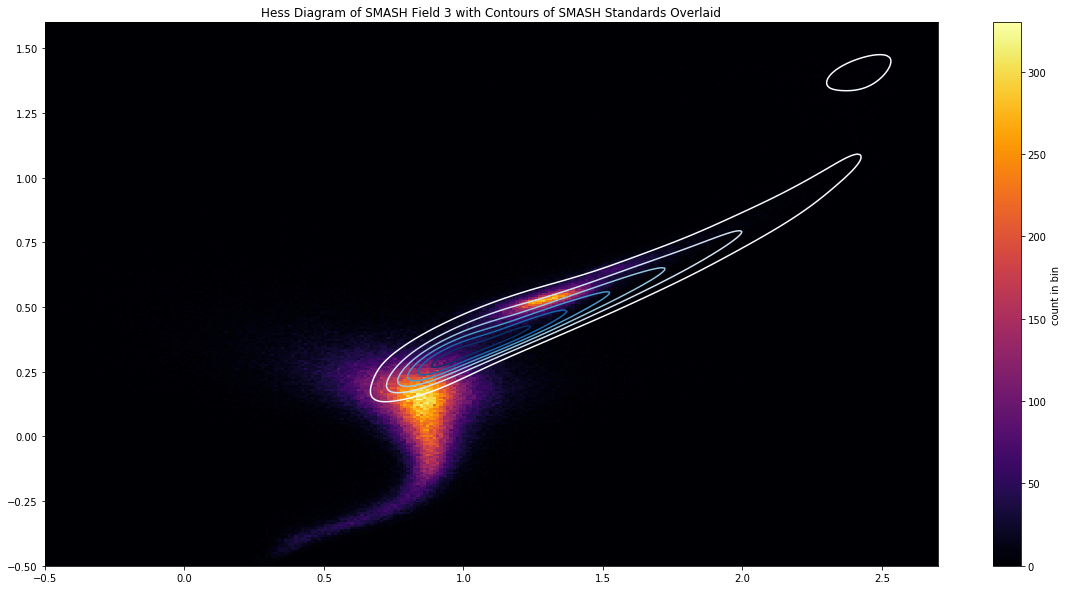

done with field [3]


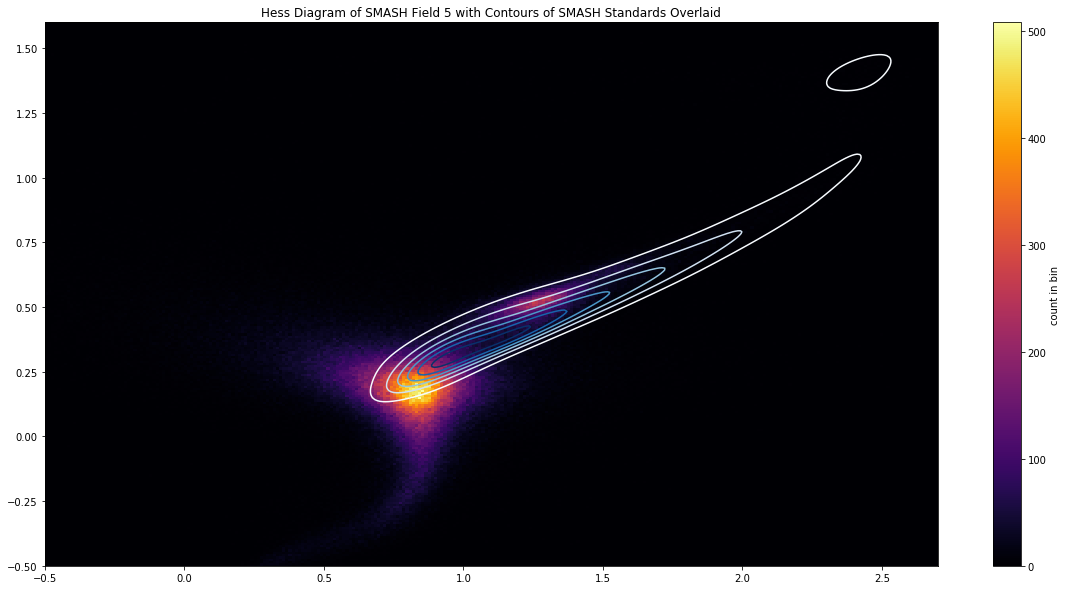

done with field [5]


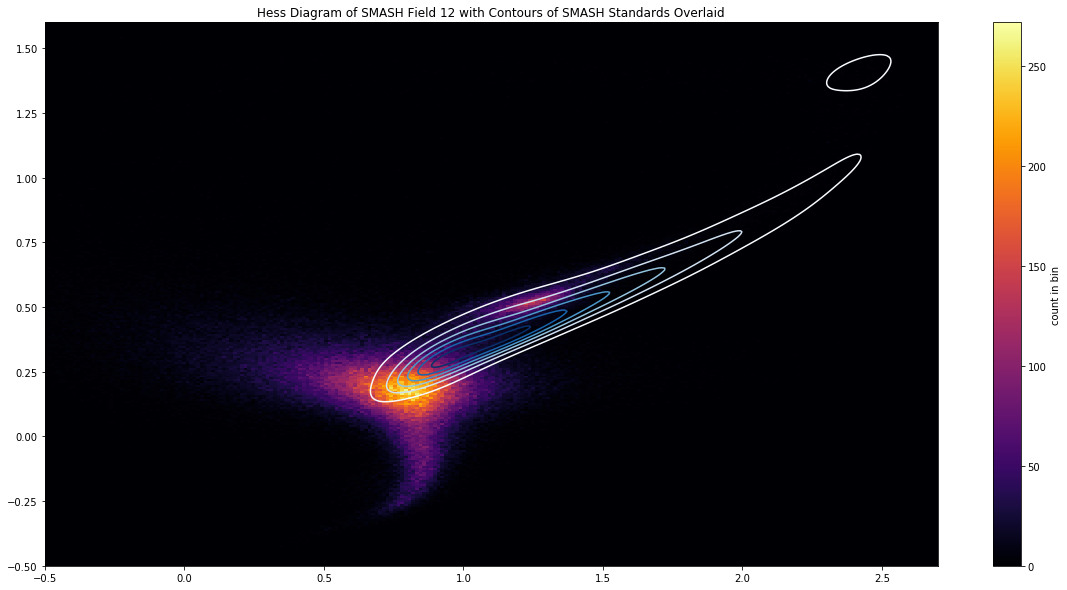

done with field [12]


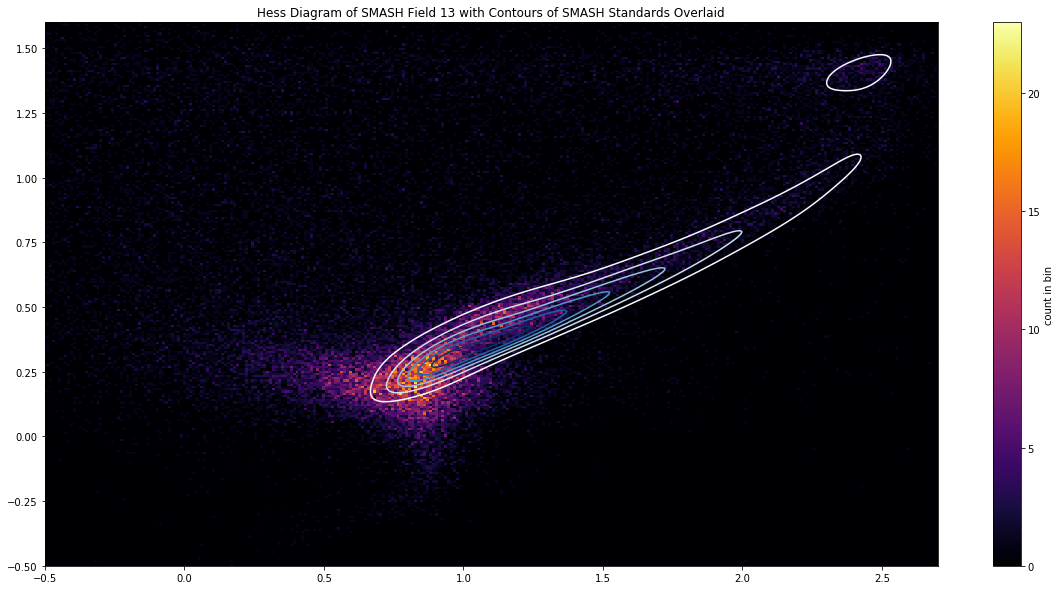

done with field [13]


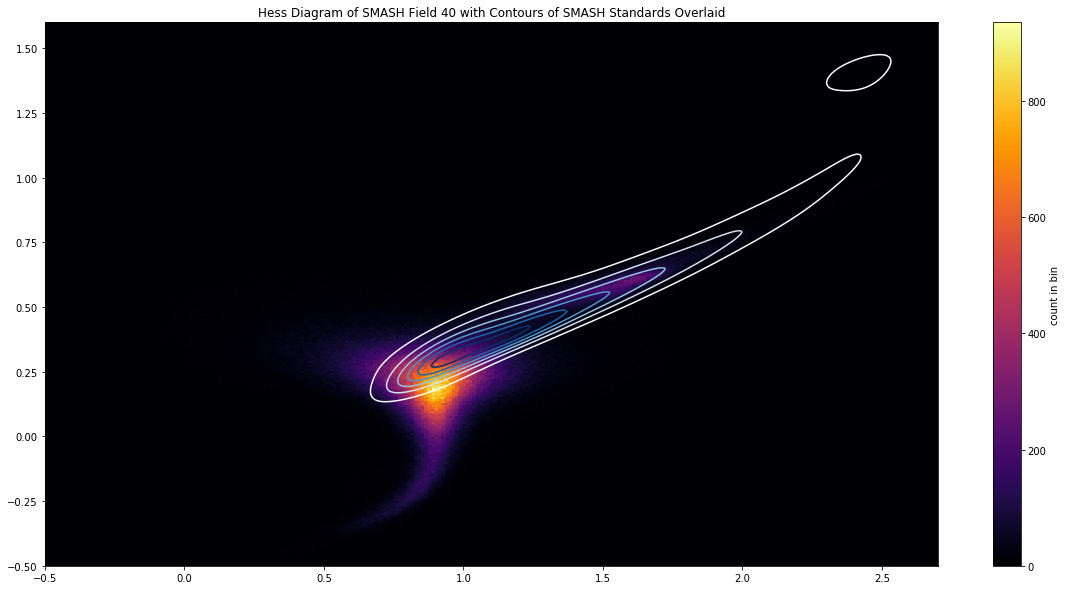

done with field [40]


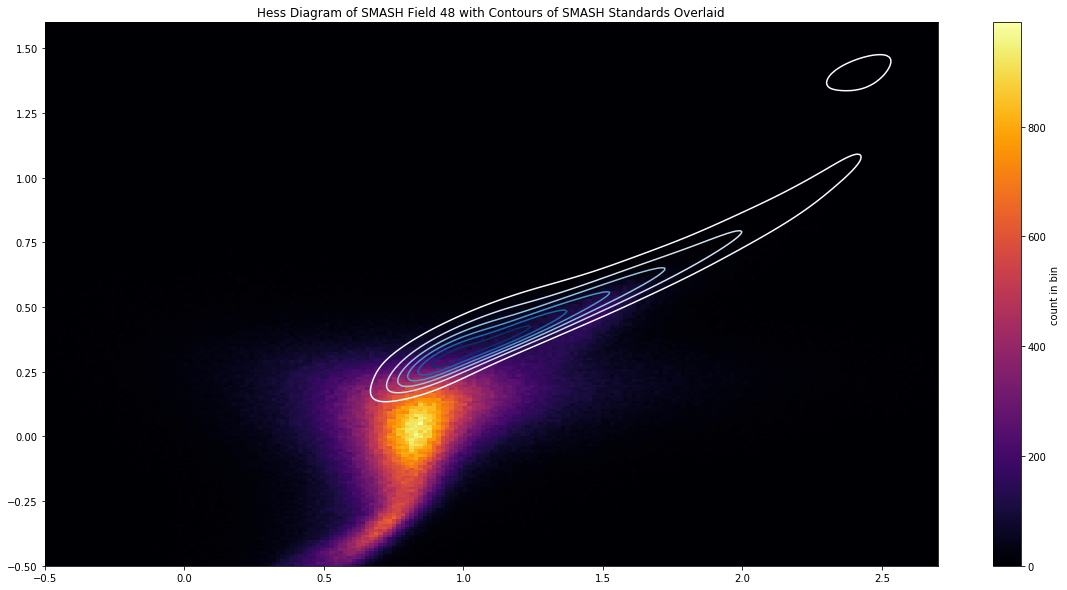

done with field [48]


/Users/amyel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less_equal
  del sys.path[0]


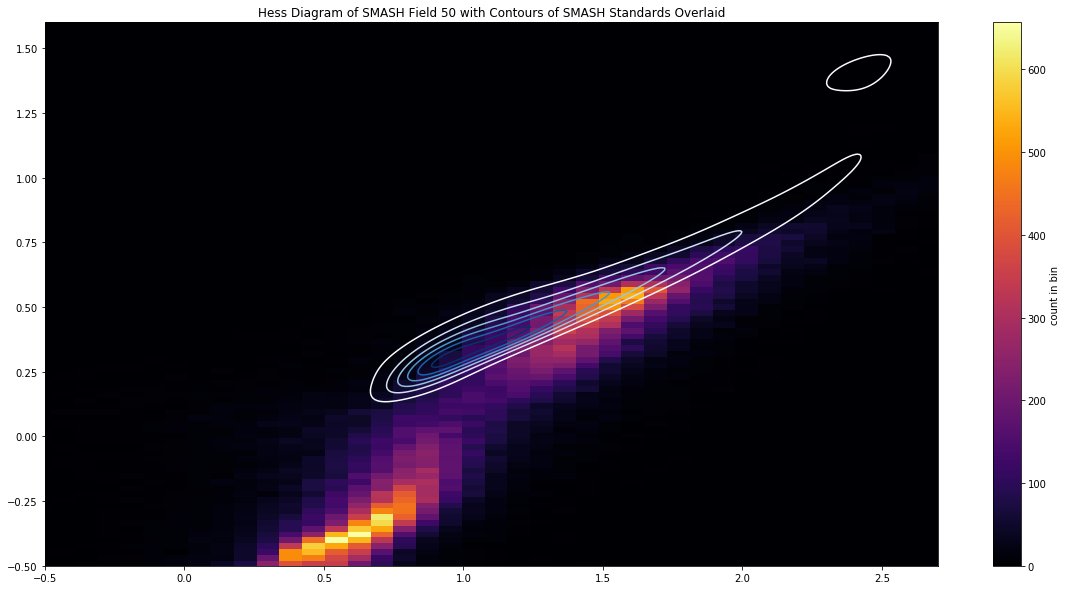

done with field [50]


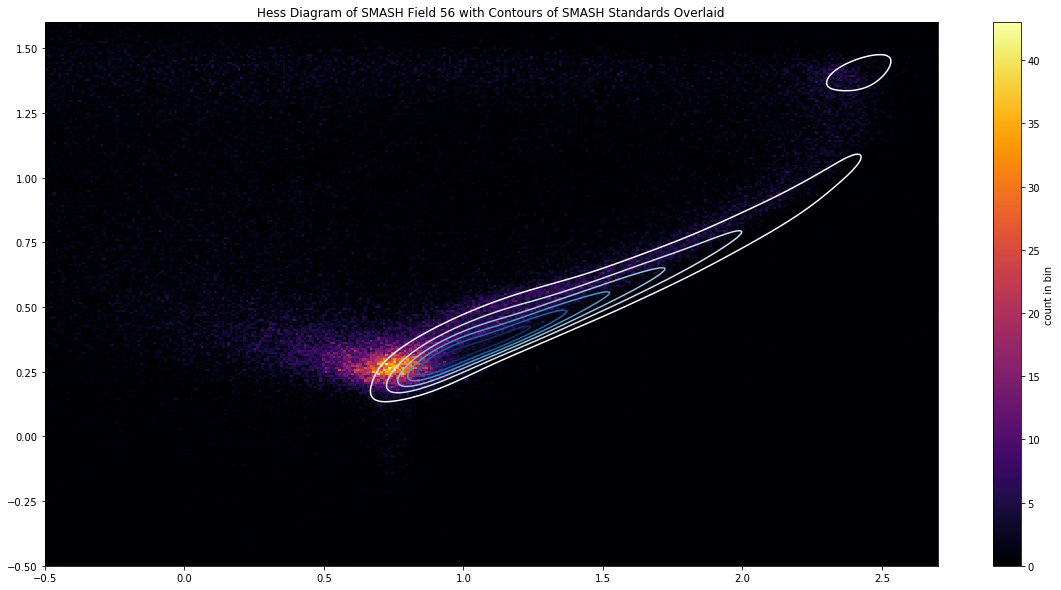

done with field [56]


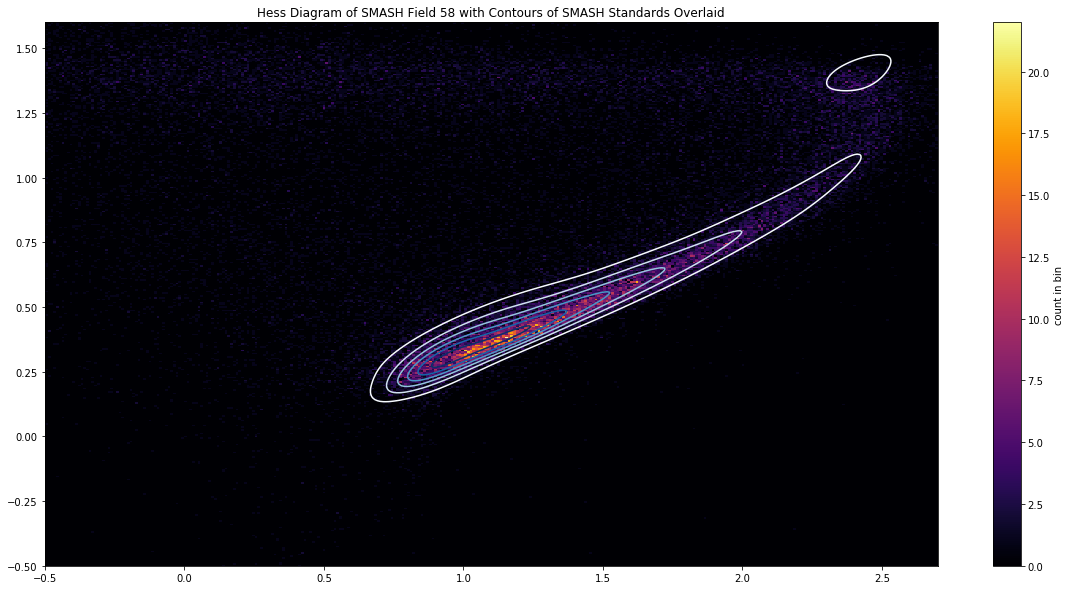

done with field [58]


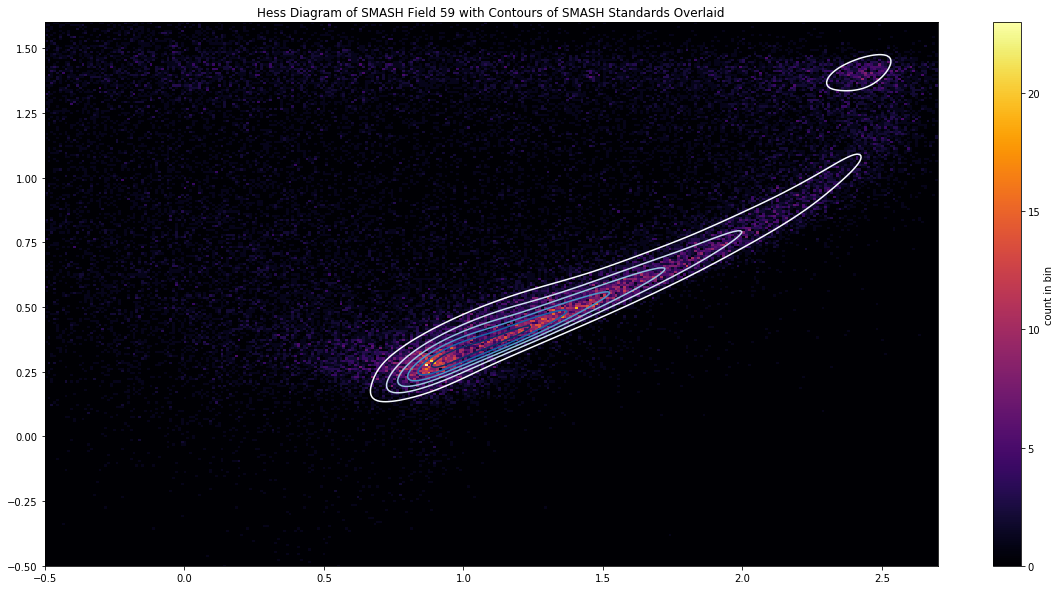

done with field [59]


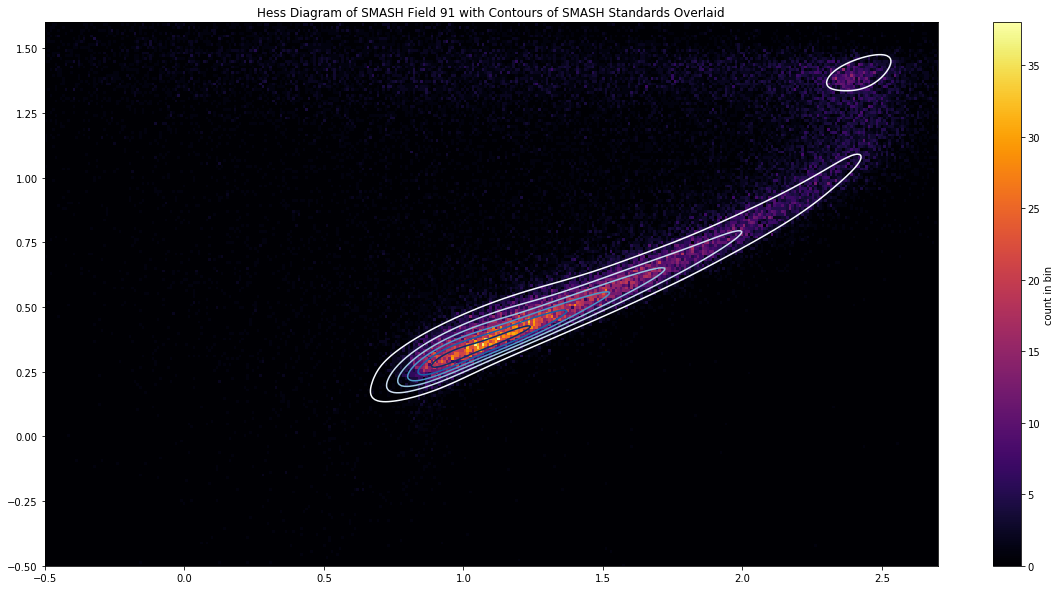

done with field [91]


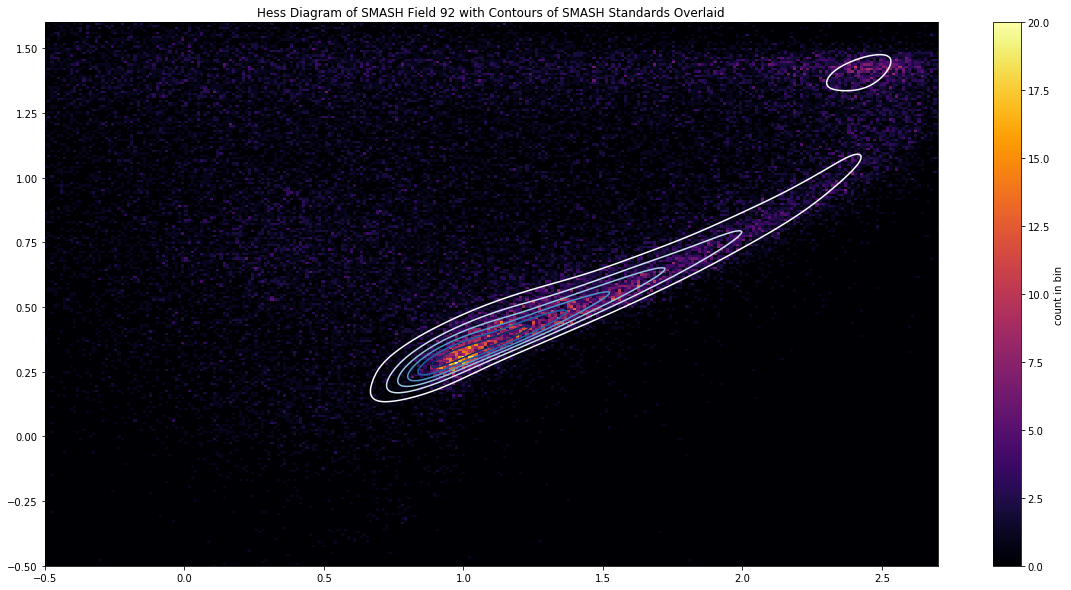

done with field [92]


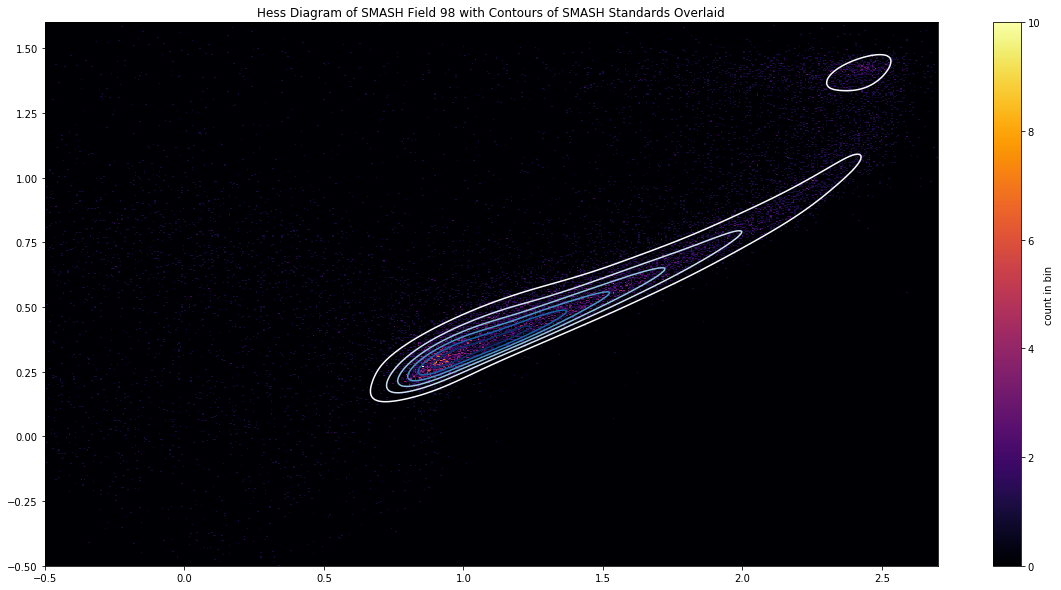

done with field [98]


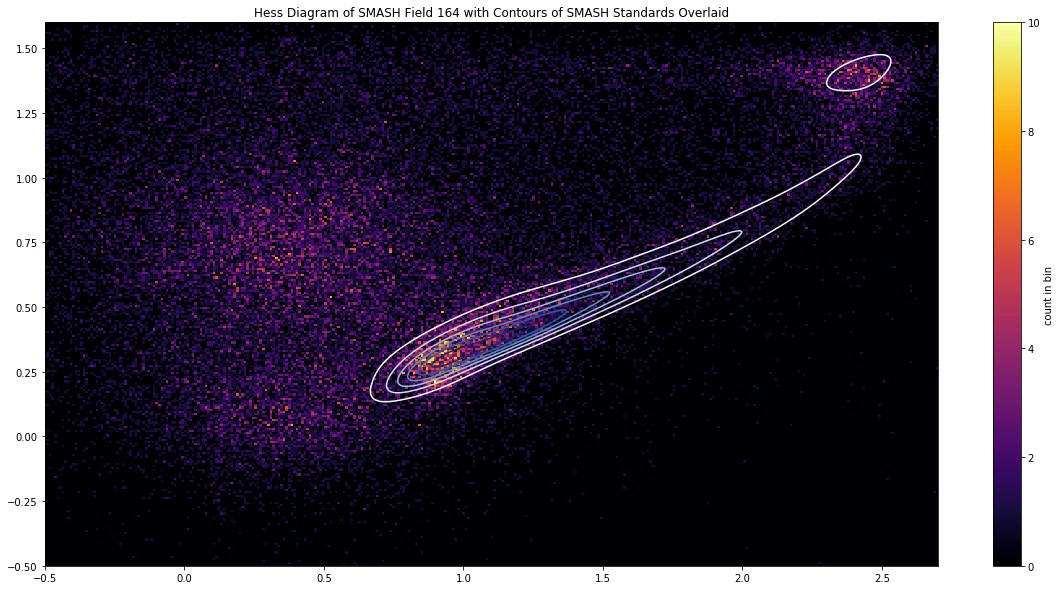

done with field [164]


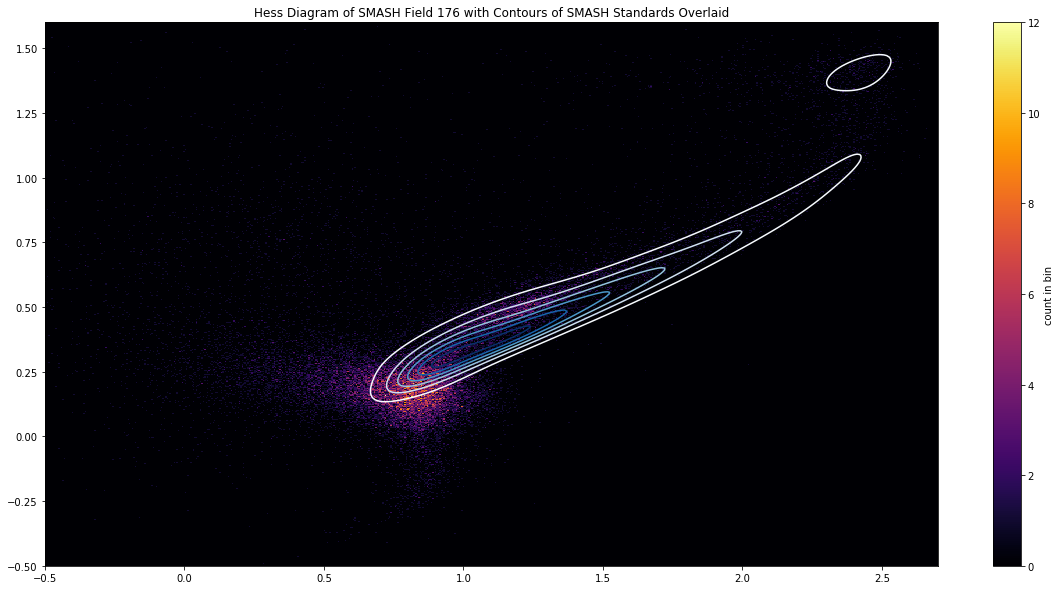

done with field [176]


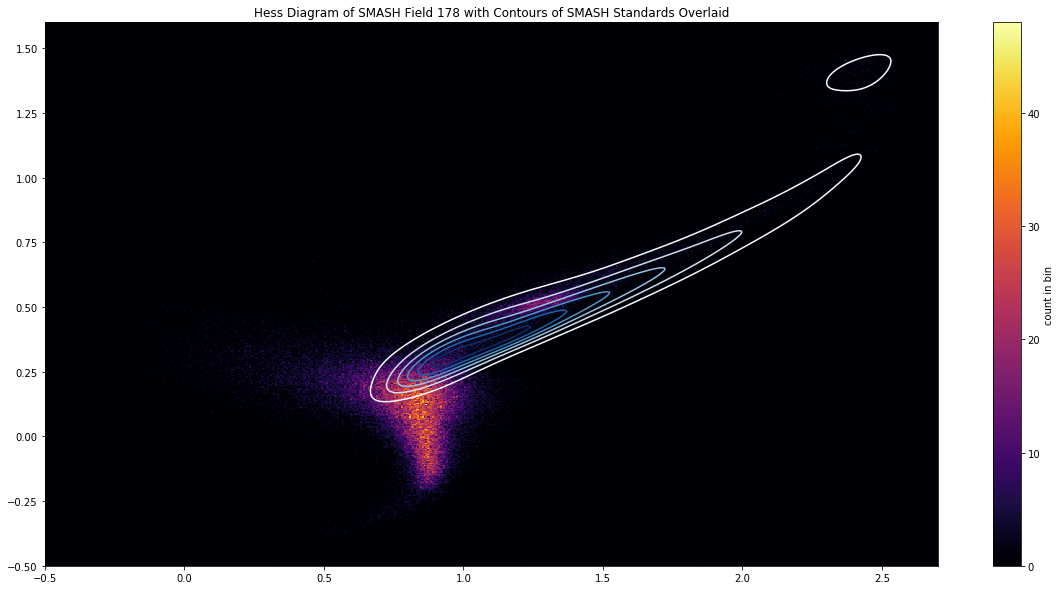

done with field [178]


In [50]:
if __name__=="__main__":
    for number in fields:
        density_plots('/Users/amyel/research/SMASH_project/datafiles/SMASH_fields/vsix/starsthree/Field{}_allobj_deep_stars.fits.gz'.format(number))

              